**Check Python version. This notebook is implemented for Python 2.7.x. Not all cells may work in other versions of Python.**

In [1]:
#import platform
#print(platform.python_version())

### Predicting Customer Churn in Telco
In this notebook you will learn how to build a predictive model with scikit-learn API and deploy it for scoring in Machine Learning (ML). 

This notebook walks you through these steps:
- Build a model with **scikit-learn** API
- Save the model in the ML repository
- Create a Deployment in ML (via UI)
- Test the model (via UI)
- Test the model (via REST API)

### Step 1: Review Use Case
The analytics use case implemented in this notebook is telco churn. While it's a simple use case, it implements all steps from the CRISP-DM methodolody, which is the recommended best practice for implementing predictive analytics. 
![CRISP-DM](https://raw.githubusercontent.com/yfphoon/dsx_demo/master/crisp_dm.png)

The analytics process starts with defining the business problem and identifying the data that can be used to solve the problem. For Telco churn, we use demographic and historical transaction data. We also know which customers have churned, which is the critical information for building predictive models. In the next step, we use visual APIs for data understanding and complete some data preparation tasks. In a typical analytics project data preparation will include more steps (for example, formatting data or deriving new variables). 

Once the data is ready, we can build a predictive model. In our example we are using the scikit-learn Random Forrest classification model. Classification is a statistical technique which assigns a "class" to each customer record (for our use case "churn" or "no churn"). Classification models use historical data to come up with the logic to predict "class", this process is called model training. After the model is created, it's usually evaluated using another data set. 

Finally, if the model's accuracy meets the expectations, it can be deployed for scoring. Scoring is the process of applying the model to a new set of data. For example, when we receive new transactional data, we can score the customer for the risk of churn.  

We also developed a sample Python Flask application to illustrate deployment: http://predictcustomerchurn.mybluemix.net/. This application implements the REST client call to the model.

### Step 2: Set up environment

In [2]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_02706219c97d4df2869fc42bfa9211a6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_jpGMtUL7mKDJde-m5VwaxkTuI_gRME7kwdyDzilneT1',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_02706219c97d4df2869fc42bfa9211a6.get_object(Bucket='demo639f96f5e4ca471391011e9a063ce8ff',Key='customer_churn.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()



,CHURN,Gender,Status,Children,Est Income,Car Owner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
0,T,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0
1,F,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0
2,F,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0
3,F,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0
4,F,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0


In [3]:
#rename some columns
data=data.rename(columns={'Est Income': 'EstIncome', 'Car Owner': 'CarOwner'})
data.head()

,CHURN,Gender,Status,Children,EstIncome,CarOwner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
0,T,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0
1,F,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0
2,F,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0
3,F,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0
4,F,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0


### Step 2: Data understanding
Data preparation and data understanding are the most time-consuming tasks in the data mining process. The data scientist needs to review and evaluate the quality of data before modeling.

Visualization is one of the ways to reivew data.

The Brunel Visualization Language is a highly succinct and novel language that defines interactive data visualizations based on tabular data. The language is well suited for both data scientists and business users. 
More information about Brunel Visualization: https://github.com/Brunel-Visualization/Brunel/wiki

Try Brunel visualization here: http://brunel.mybluemix.net/gallery_app/renderer

In [4]:
import brunel
%brunel data('data') bar x(CHURN) y(EstIncome) mean(EstIncome) color(LocalBilltype) stack tooltip(EstIncome) | x(LongDistance) y(Usage) point color(Paymethod) tooltip(LongDistance, Usage) :: width=1100, height=400 

<IPython.core.display.Javascript object>

**PixieDust** is a Python Helper library for Spark IPython Notebooks. One of it's main features are visualizations. You'll notice that unlike other APIs which produce just output, PixieDust creates an **interactive UI** in which you can explore data.

More information about PixieDust: https://github.com/ibm-cds-labs/pixiedust?cm_mc_uid=78151411419314871783930&cm_mc_sid_50200000=1487962969


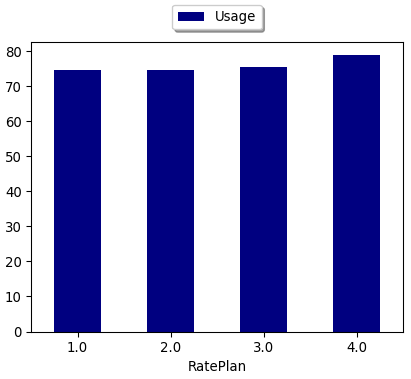

In [5]:
from pixiedust.display import *
display(data)

### Step 3: Build the Random Forest model

In [6]:
import sklearn
pd.options.display.max_columns = 999

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency,ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score

import numpy as np

import urllib3, requests, json

In [7]:
#convert CHURN to 1/0
le = LabelEncoder()
data.loc[:,'CHURN']= le.fit_transform(data.loc[:,'CHURN'])
data.head()

,CHURN,Gender,Status,Children,EstIncome,CarOwner,Age,LongDistance,International,Local,Dropped,Paymethod,LocalBilltype,LongDistanceBilltype,Usage,RatePlan
0,1,F,S,1.0,38000.00,N,24.393333,23.56,0.0,206.08,0.0,CC,Budget,Intnl_discount,229.64,3.0
1,0,M,M,2.0,29616.00,N,49.426667,29.78,0.0,45.50,0.0,CH,FreeLocal,Standard,75.29,2.0
2,0,M,M,0.0,19732.80,N,50.673333,24.81,0.0,22.44,0.0,CC,FreeLocal,Standard,47.25,3.0
3,0,M,S,2.0,96.33,N,56.473333,26.13,0.0,32.88,1.0,CC,Budget,Standard,59.01,1.0
4,0,F,M,2.0,52004.80,N,25.140000,5.03,0.0,23.11,0.0,CH,Budget,Intnl_discount,28.14,1.0


In [8]:
# define the label and features
y = np.float32(data.CHURN)
x = data.drop(['CHURN'], axis = 1)

In [9]:
!pip install sklearn-pandas

Requirement not upgraded as not directly required: pandas>=0.11.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from sklearn-pandas)
Requirement not upgraded as not directly required: numpy>=1.6.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from sklearn-pandas)
Requirement not upgraded as not directly required: scikit-learn>=0.15.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from sklearn-pandas)
Requirement not upgraded as not directly required: scipy>=0.14 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from sklearn-pandas)
Requirement not upgraded as not directly required: python-dateutil>=2 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas>=0.11.0->sklearn-pandas)
Requirement not upgraded as not directly required: pytz>=2011k in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pandas>=0.11.0->sklearn-pandas)
Requirement not upgraded as not directly required: six>=1.5 in /opt/conda/envs

In [10]:
# Apply the LabelEncoder to encode the input features in numeric form where applicable
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper(
    [('Gender', LabelEncoder()),
     ('Status', LabelEncoder()),
     ('Children', None),
     ('EstIncome',None),
     ('CarOwner', LabelEncoder()),
     ('Age',None),
     ('LongDistance',None),
     ('International',None),
     ('Local',None),
     ('Dropped',None),
     ('Paymethod',LabelEncoder()),
     ('LocalBilltype',LabelEncoder()),
     ('LongDistanceBilltype',LabelEncoder()),
     ('Usage',None),
     ('RatePlan',None)
    ]
)

In [11]:
# split the data to training and testing set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# fit the model

import sklearn.pipeline
from sklearn.preprocessing import OneHotEncoder

random_forest = RandomForestClassifier()
steps = [('mapper', mapper),('RandonForestClassifier', random_forest)]
pipeline = sklearn.pipeline.Pipeline(steps)
model=pipeline.fit( X_train, y_train )
model

Pipeline(memory=None,
     steps=[('mapper', DataFrameMapper(default=False, df_out=False,
        features=[('Gender', LabelEncoder()), ('Status', LabelEncoder()), ('Children', None), ('EstIncome', None), ('CarOwner', LabelEncoder()), ('Age', None), ('LongDistance', None), ('International', None), ('Local', None), ('Dropped',...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [13]:
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = pipeline.predict( X_test )

### test your predictions using sklearn.classification_report()

report = sklearn.metrics.classification_report( y_test, y_prediction )
### and print the report
print(report)

             precision    recall  f1-score   support

        0.0       0.97      0.98      0.97       245
        1.0       0.97      0.95      0.96       169

avg / total       0.97      0.97      0.97       414



### Step 4: Save model to ML Repository

In [18]:
# View the test data before saving
y_test_df = pd.DataFrame(y_test,columns=['CHURN'])
y_test_df.head()

,CHURN
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [19]:
#from dsx_ml.ml import save

#model_name = "Telco_Churn_SKL_model"
#save(model = model, name = model_name, x_test=X_test, y_test=y_test_df, algorithm_type = 'Classification')

In [16]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2018-07-24 16:13:33,224 - watson_machine_learning_client.wml_client_error - WARNING - Unexpected type of 'details', expected: 'deployment_details_type', actual: 'unknown_type'.
2018-07-24 16:15:47,005 - watson_machine_learning_client.wml_client_error - WARNING - Failure during scoring. (POST https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/published_models/605f191f-98c9-4e55-8c83-ffbe49d36af3)
Status code: 405, body: HTTP method not allowed, supported methods: GET, DELETE, PATCH
2018-07-24 16:18:29,065 - watson_machine_learning_client.wml_client_error - WARNING - Failure during scoring. (POST https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/deployments/410a82ca-739b-4077-860a-61454ffe78bf/online)
Status code: 400, body: {"trace": "c3ba3507d5afb654b257ce5e91687a13", "status_code": 400, "errors": [{"message": "Input json is missing 'fields' key for sklearn_pandas model", "code": "invalid_input_data", "targe

In [17]:
wml_credentials = {
    "url": "https://ibm-watson-ml.mybluemix.net",
    #"access_key": "",
    "username": "4be82790-d71b-4c9f-ac4e-5af3c4b9c9b1",
    "password": "47571902-8632-47e8-9590-323f49975136",
    "instance_id": "d360e86c-6ddd-45f7-a908-d1ebf83a211d"
}

In [18]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [25]:
model_props = {client.repository.ModelMetaNames.NAME: "Telco_Churn_SKL_model"}
#model_details = client.repository.store_model(pipeline, model_props)
model_details = client.repository.store_model(model, model_props)

In [26]:
# Display a list of all the models.
client.repository.list_models()

------------------------------------  ------------------------------  ------------------------  -----------------
GUID                                  NAME                            CREATED                   FRAMEWORK
371d41a1-cf31-41a5-8d30-b5a32a4f12ee  RetailChurn                     2018-06-26T21:43:38.280Z  spss-modeler-18.1
1675d3bc-beed-4c6a-819a-e35d4b591c5d  XGBoost model for Retail Churn  2018-07-24T16:05:10.478Z  scikit-learn-0.19
605f191f-98c9-4e55-8c83-ffbe49d36af3  Telco_Churn_SKL_model           2018-07-24T16:12:53.992Z  scikit-learn-0.19
------------------------------------  ------------------------------  ------------------------  -----------------


In [27]:
# Extract the uid.
model_uid = client.repository.get_model_uid(model_details)
print(model_uid)

605f191f-98c9-4e55-8c83-ffbe49d36af3


In [28]:
# Create the deployment.
deployment_details = client.deployments.create(model_uid, 'Predict_Telco_Churn_SKL')



#######################################################################################

Synchronous deployment creation for uid: '605f191f-98c9-4e55-8c83-ffbe49d36af3' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='410a82ca-739b-4077-860a-61454ffe78bf'
------------------------------------------------------------------------------------------------




In [29]:
# List the deployments.
client.deployments.list()

------------------------------------  --------------------------  ------  --------------  ------------------------  -----------------
GUID                                  NAME                        TYPE    STATE           CREATED                   FRAMEWORK
410a82ca-739b-4077-860a-61454ffe78bf  Predict_Telco_Churn_SKL     online  DEPLOY_SUCCESS  2018-07-24T16:13:19.400Z  scikit-learn-0.19
86a0da67-b85b-4b3f-b035-2f7bdae2d5c2  RetailChurn                 online  DEPLOY_SUCCESS  2018-07-12T17:44:13.055Z  spss-modeler-18.1
f43c176a-a88e-465e-ae03-2f5196641453  Predict Churn with XGBoost  online  DEPLOY_SUCCESS  2018-07-24T16:05:26.221Z  scikit-learn-0.19
------------------------------------  --------------------------  ------  --------------  ------------------------  -----------------


In [30]:
# Extract endpoint url and display it.
scoring_url = client.deployments.get_scoring_url(deployment_details)
print(scoring_url)

UnexpectedType: Unexpected type of 'details', expected: 'deployment_details_type', actual: 'unknown_type'.

In [31]:
deployment_details

{'entity': {'deployable_asset': {'created_at': '2018-07-24T16:13:19.349Z',
   'guid': '605f191f-98c9-4e55-8c83-ffbe49d36af3',
   'name': 'Telco_Churn_SKL_model',
   'type': 'model',
   'url': 'https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/published_models/605f191f-98c9-4e55-8c83-ffbe49d36af3'},
  'deployed_version': {'guid': 'e49c474a-4ca6-4ac2-957d-daca22b629e2',
   'url': 'https://ibm-watson-ml.mybluemix.net/v3/ml_assets/models/605f191f-98c9-4e55-8c83-ffbe49d36af3/versions/e49c474a-4ca6-4ac2-957d-daca22b629e2'},
  'description': 'Description of deployment',
  'model_type': 'scikit-learn-0.19',
  'name': 'Predict_Telco_Churn_SKL',
  'runtime_environment': 'python-3.5',
  'scoring_url': 'https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/deployments/410a82ca-739b-4077-860a-61454ffe78bf/online',
  'status': 'DEPLOY_SUCCESS',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'type': 'online'},
 'metadata

In [41]:
scoring_url = deployment_details['entity']['scoring_url']

In [45]:
scoring_url

'https://ibm-watson-ml.mybluemix.net/v3/wml_instances/d360e86c-6ddd-45f7-a908-d1ebf83a211d/deployments/410a82ca-739b-4077-860a-61454ffe78bf/online'

In [46]:
# Prepare scoring payload.
#payload_scoring = {"values": [X_test.iloc[0].tolist()]}
#print(payload_scoring)

{'values': [['F', 'M', 2.0, 64816.599999999999, 'Y', 31.126666999999998, 21.0, 0.0, 6.8700000000000001, 0.0, 'CC', 'Budget', 'Standard', 27.870000000000001, 1.0]]}


In [51]:
payload_scoring = {
    "fields": [
    "ID",
    "Gender",
    "Status",
    "Children",
    "EstIncome",
    "CarOwner",
    "Age",
    "LongDistance",
    "International",
    "Local",
    "Dropped",
    "Paymethod",
    "LocalBilltype",
    "LongDistanceBilltype",
    "Usage",
    "RatePlan"
    ],
    "values": [ [999,"F","M",2.0,77551.100000,"Y",33.600000,20.530000,0.000000,41.890000,1.000000,"CC","Budget","Standard",62.420000,2.000000] ]
} 



In [52]:
# Perform prediction and display the result.
response_scoring = client.deployments.score(scoring_url, payload_scoring)
print(response_scoring)

{'fields': ['prediction', 'probability'], 'values': [[0.0, [1.0, 0.0]]]}
